<a href="https://colab.research.google.com/github/skhazaei/TensorFlow-repo/blob/master/RockPaperScissors_Multiclass_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Rock-Paper-Scissors dataset

These images have all been generated using CGI techniques as an experiment in determining if a CGI-based dataset can be used for classification against real images.

# Download the dataset

In [1]:
!wget --no-check-certificate  \
https://storage.googleapis.com/laurencemoroney-blog.appspot.com/rps.zip \
    -O /tmp/rps.zip

--2021-02-15 12:11:10--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/rps.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 64.233.189.128, 108.177.97.128, 108.177.125.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|64.233.189.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 200682221 (191M) [application/zip]
Saving to: ‘/tmp/rps.zip’

/tmp/rps.zip        100%[===================>] 191.38M   191MB/s    in 1.0s    

2021-02-15 12:11:11 (191 MB/s) - ‘/tmp/rps.zip’ saved [200682221/200682221]



In [2]:
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/rps-test-set.zip \
    -O /tmp/rps-test-set.zip

--2021-02-15 12:11:11--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/rps-test-set.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 64.233.188.128, 64.233.189.128, 2404:6800:4008:c02::80, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|64.233.188.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 29516758 (28M) [application/zip]
Saving to: ‘/tmp/rps-test-set.zip’

/tmp/rps-test-set.z 100%[===================>]  28.15M   136MB/s    in 0.2s    

2021-02-15 12:11:12 (136 MB/s) - ‘/tmp/rps-test-set.zip’ saved [29516758/29516758]



In [3]:
import zipfile

zip_local = '/tmp/rps.zip'
ref_zip = zipfile.ZipFile(zip_local, 'r')
ref_zip.extractall('/tmp')
ref_zip.close()

zip_local = '/tmp/rps-test-set.zip'
ref_zip = zipfile.ZipFile(zip_local, 'r')
ref_zip.extractall('/tmp')
ref_zip.close()

In [4]:
import os

train_dir = os.path.join('/tmp/rps')
test_dir = os.path.join('/tmp/rps-test-set')

In [5]:
train_paper_dir = os.path.join(train_dir, 'paper')
train_rock_dir = os.path.join(train_dir, 'rock')
train_scissor_dir = os.path.join(train_dir, 'scissors')

In [6]:
train_paper_fname = os.listdir(train_paper_dir)
train_rock_fname = os.listdir(train_rock_dir)
train_scissor_fname = os.listdir(train_scissor_dir)

In [7]:
print ('total train paper images: {}'.format(len(train_paper_fname)))
print ('total train rock images: {}'.format(len(train_rock_fname)))
print ('total train scissor images: {}'.format(len(train_scissor_fname)))

total train paper images: 840
total train rock images: 840
total train scissor images: 840


In [8]:
print (train_paper_fname[:5])

['paper03-003.png', 'paper03-057.png', 'paper03-006.png', 'paper03-109.png', 'paper02-037.png']


In [9]:
print(train_rock_fname[:5])

['rock07-k03-000.png', 'rock04-070.png', 'rock07-k03-088.png', 'rock07-k03-008.png', 'rock06ck02-008.png']


In [10]:
print(train_scissor_fname[:5])

['scissors02-002.png', 'testscissors02-073.png', 'testscissors02-068.png', 'scissors03-001.png', 'scissors04-110.png']


# Plot some of training images

In [11]:
%matplotlib inline

pic_index = 0

nrows = 3
ncols = 3


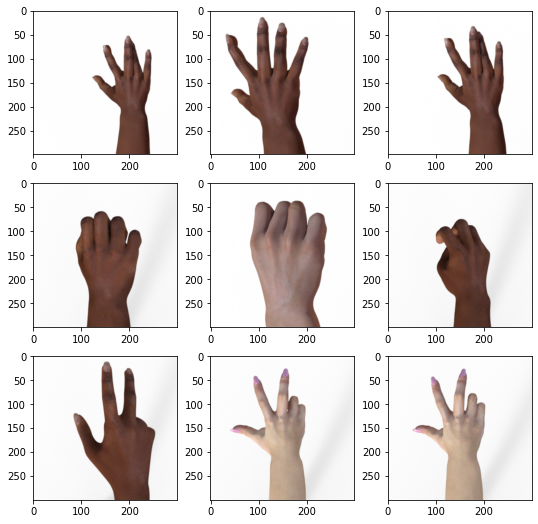

In [12]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

fig = plt.gcf()
fig.set_size_inches(3*nrows, 3*ncols)

pic_index += 3

next_paper_index = [os.path.join(train_paper_dir, fname) for fname in train_paper_fname[pic_index-3:pic_index]]
next_rock_index = [os.path.join(train_rock_dir, fname) for fname in train_rock_fname[pic_index-3:pic_index]]
next_scissor_index = [os.path.join(train_scissor_dir, fname) for fname in train_scissor_fname[pic_index-3:pic_index]]

for i, img_path in enumerate(next_paper_index+next_rock_index+next_scissor_index):
  plt.subplot(nrows, ncols, i+ 1)
  image = mpimg.imread(img_path)
  plt.imshow(image)
plt.show()

# Multiclass classifications

## Set train and test generators 

In [13]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale = 1./255.,
    rotation_range = 40,
    height_shift_range = 0.2,
    width_shift_range = 0.2,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
    fill_mode = 'nearest'
)

validation_datagen = ImageDataGenerator(
    rescale = 1./255.
)

train_generator = train_datagen.flow_from_directory(
	train_dir,
	target_size=(150,150),
	class_mode='categorical',
  batch_size=126
)

validation_generator = validation_datagen.flow_from_directory(
    test_dir,
    batch_size = 126,
    target_size = (150, 150),
    class_mode = 'categorical'
)

Found 2520 images belonging to 3 classes.
Found 372 images belonging to 3 classes.


# Model

In [14]:
import tensorflow as tf


model = tf.keras.models.Sequential([
                                    tf.keras.layers.Conv2D(64, (3,3), activation = tf.nn.relu, input_shape=(150, 150, 3)),
                                    tf.keras.layers.MaxPooling2D(2,2),
                                    tf.keras.layers.Conv2D(64, (3,3), activation = tf.nn.relu),
                                    tf.keras.layers.MaxPooling2D(2,2),
                                    tf.keras.layers.Conv2D(128, (3,3), activation = tf.nn.relu),
                                    tf.keras.layers.MaxPooling2D(2,2),
                                    tf.keras.layers.Conv2D(128, (3,3), activation = tf.nn.relu),
                                    tf.keras.layers.MaxPooling2D(2,2),
                                    tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dropout(0.5),
                                    tf.keras.layers.Dense(512, activation = tf.nn.relu),
                                    tf.keras.layers.Dense(3, activation = tf.nn.softmax)
])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 64)      1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       1

# Compile the model

In [15]:
model.compile(optimizer=tf.optimizers.RMSprop(lr=1e-4), loss='categorical_crossentropy', metrics=['accuracy'])

In [16]:
history = model.fit_generator(
    train_generator,
    epochs = 25,
    steps_per_epoch = 20,
    validation_data = validation_generator,
    validation_steps = 3,
    verbose = 2
)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/25
20/20 - 27s - loss: 1.1051 - accuracy: 0.3567 - val_loss: 1.0769 - val_accuracy: 0.4194
Epoch 2/25
20/20 - 22s - loss: 1.0596 - accuracy: 0.4413 - val_loss: 0.9956 - val_accuracy: 0.5591
Epoch 3/25
20/20 - 22s - loss: 1.0026 - accuracy: 0.5067 - val_loss: 0.8603 - val_accuracy: 0.7392
Epoch 4/25
20/20 - 23s - loss: 0.9229 - accuracy: 0.5770 - val_loss: 0.6943 - val_accuracy: 0.8656
Epoch 5/25
20/20 - 22s - loss: 0.8401 - accuracy: 0.6159 - val_loss: 0.6740 - val_accuracy: 0.7366
Epoch 6/25
20/20 - 22s - loss: 0.7704 - accuracy: 0.6639 - val_loss: 0.5199 - val_accuracy: 0.8683
Epoch 7/25
20/20 - 22s - loss: 0.7133 - accuracy: 0.7103 - val_loss: 0.4827 - val_accuracy: 0.7312
Epoch 8/25
20/20 - 22s - loss: 0.6534 - accuracy: 0.7373 - val_loss: 0.3714 - val_accuracy: 0.9382
Epoch 9/25
20/20 - 22s - loss: 0.6406 - accuracy: 0.7258 - val_loss: 0.3416 - val_accuracy: 0.9516
Epoch 10/25
20/20 - 22s - loss: 0.6176 - accuracy: 0.7381 - val_loss: 0.3062 - val_accuracy: 0.9489
Epoch 11/

# Save the model

In [17]:
model.save('rps.h5')

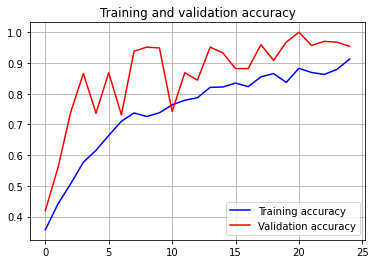

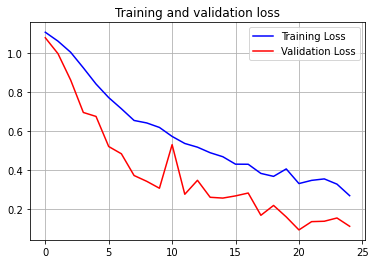

In [18]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
acc_val = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training accuracy')
plt.plot(epochs, acc_val, 'r', label = 'Validation accuracy')
plt.title('Training and validation accuracy')
plt.grid()
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label = 'Validation Loss')
plt.title('Training and validation loss')
plt.grid()
plt.legend()

plt.show()